In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from astropy import stats

In [2]:
data_file0 = "./Bias_BIN1_20190506_021550.fits"
data_file1 = "./Bias_BIN1_20190506_021556.fits"
data_file2 = "./Bias_BIN1_20190506_021602.fits"
data_file3 = "./Bias_BIN1_20190506_021607.fits"
data_file4 = "./M 82_sdss_r_20190505_034424.fits"
data_file5 = "./domeflat_sdss_r_001.fits"
data_file6 = "./domeflat_sdss_r_002.fits"

my_fits_file0 = fits.open(data_file0)
my_fits_file1 = fits.open(data_file1)
my_fits_file2 = fits.open(data_file2)
my_fits_file3 = fits.open(data_file3)
my_fits_file4 = fits.open(data_file4)
my_fits_file5 = fits.open(data_file5)
my_fits_file6 = fits.open(data_file6)


my_fits_file0.info()
my_fits_file1.info()
my_fits_file2.info()
my_fits_file3.info()
my_fits_file4.info()
my_fits_file5.info()
my_fits_file6.info()


my_fits_file0[0].scale('int64','bzero')
my_fits_file1[0].scale('int64','bzero')
my_fits_file2[0].scale('int64','bzero')
my_fits_file3[0].scale('int64','bzero')
my_fits_file4[0].scale('int64','bzero')
my_fits_file5[0].scale('int64','bzero')
my_fits_file6[0].scale('int64','bzero')


bias1 = my_fits_file0[0].data
bias2 = my_fits_file1[0].data
bias3 = my_fits_file2[0].data
bias4 = my_fits_file3[0].data
M82 = my_fits_file4[0].data
flatr1 = my_fits_file5[0].data
flatr2 = my_fits_file6[0].data

Filename: ./Bias_BIN1_20190506_021550.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   (1024, 1024)   int16 (rescales to uint16)   
Filename: ./Bias_BIN1_20190506_021556.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   (1024, 1024)   int16 (rescales to uint16)   
Filename: ./Bias_BIN1_20190506_021602.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   (1024, 1024)   int16 (rescales to uint16)   
Filename: ./Bias_BIN1_20190506_021607.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   (1024, 1024)   int16 (rescales to uint16)   
Filename: ./M 82_sdss_r_20190505_034424.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     108   (1024, 1024)   int16 (rescales to uint16)   
Filename: ./domeflat_sdss_r_001.fits
N

In [12]:
masterbias = (bias1 + bias2 + bias3 + bias4)/4
bias1.mean(),bias2.mean(),bias3.mean(),bias4.mean(),masterbias.mean()

(1309.5129508972168,
 1309.501971244812,
 1309.4899234771729,
 1309.5117416381836,
 1309.5041468143463)

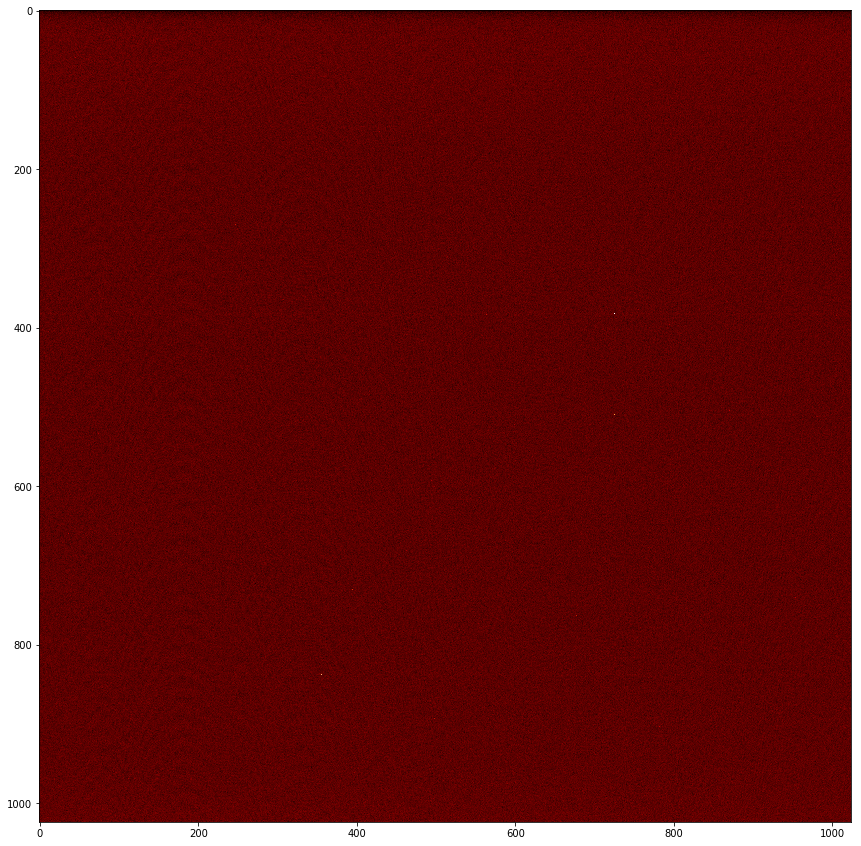

In [4]:
fig, ax = plt.subplots(1,1)

fig.set_size_inches(12,12)

fig.tight_layout()

ax.imshow(np.log10(masterbias), cmap=plt.cm.get_cmap("gist_heat"))

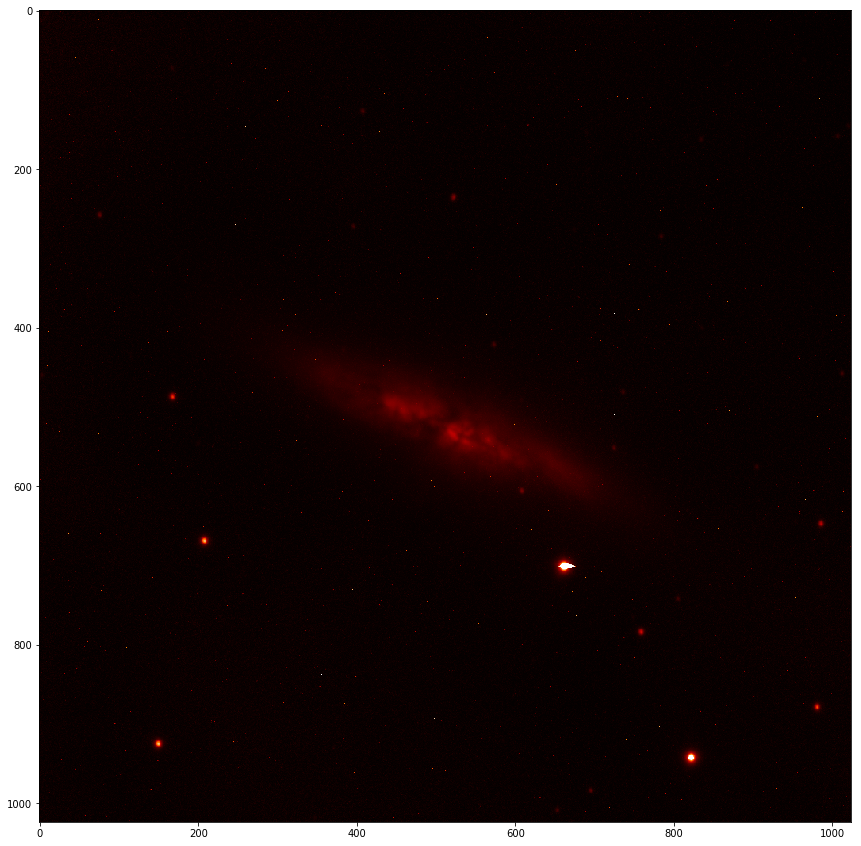

In [5]:
fig, ax = plt.subplots(1,1)

fig.set_size_inches(12,12)

fig.tight_layout()

ax.imshow(np.log10(M82), cmap=plt.cm.get_cmap("gist_heat"))

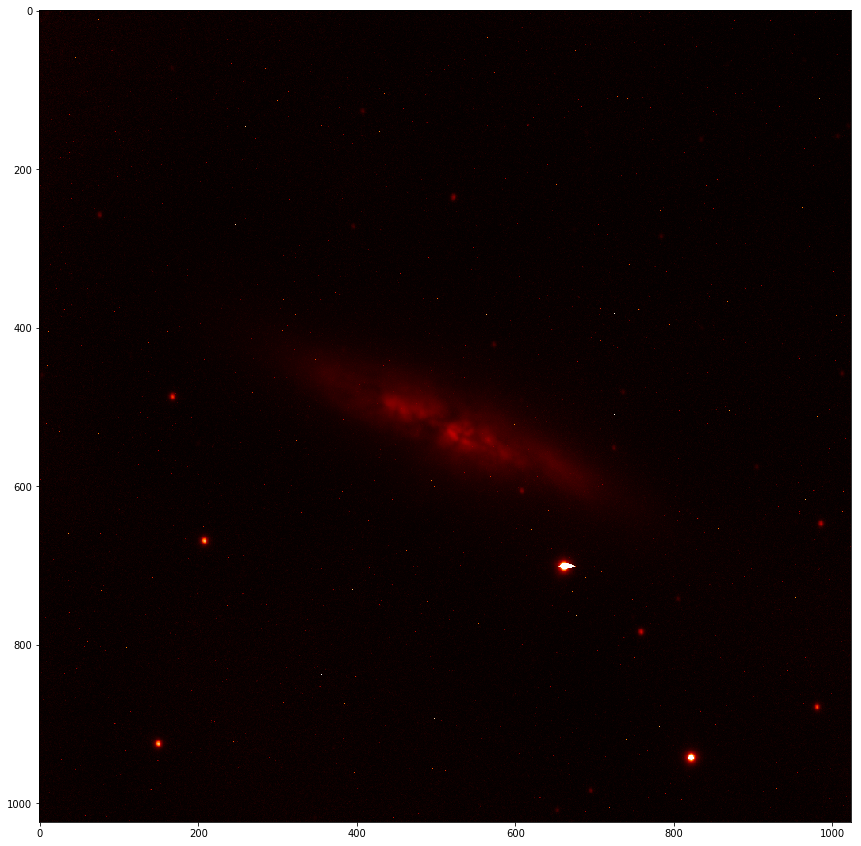

In [6]:
fig, ax = plt.subplots(1,1)

fig.set_size_inches(12,12)

fig.tight_layout()

ax.imshow(np.log10(M82)-np.log10(masterbias), cmap=plt.cm.get_cmap("gist_heat"))

In [7]:
rflatmaster = ((flatr1 + flatr2)/2) -masterbias

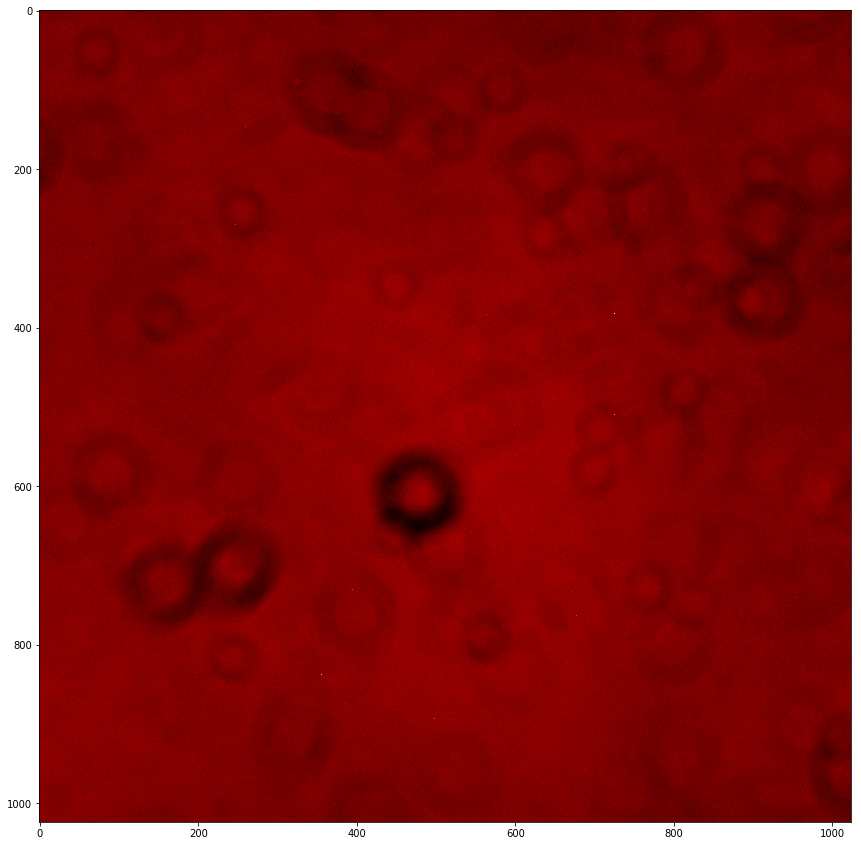

In [8]:
fig, ax = plt.subplots(1,1)

fig.set_size_inches(12,12)

fig.tight_layout()

ax.imshow(np.log10(rflatmaster), cmap=plt.cm.get_cmap("gist_heat"))

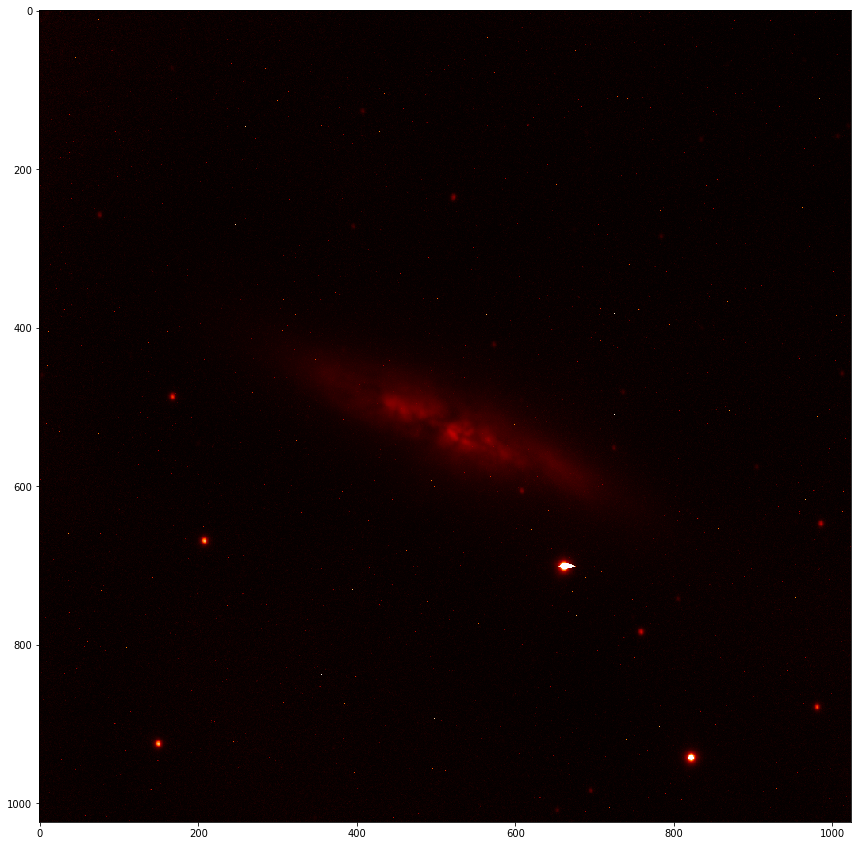

In [9]:
M82red = np.log10(M82/masterbias)/np.log10(rflatmaster)
fig, ax = plt.subplots(1,1)

fig.set_size_inches(12,12)

fig.tight_layout()

ax.imshow(M82red, cmap=plt.cm.get_cmap("gist_heat"))

In [17]:
from astropy.stats import sigma_clipped_stats
from photutils import datasets
file = fits.open('./quadRU.fits')
file[0].scale('int64','bzero')
data = file[0].data
mean, median, std = sigma_clipped_stats(data, sigma=3.0)    
print((mean, median, std))    


(270.9359159840968, 267.0, 23.289173209193102)


In [23]:
from photutils import DAOStarFinder
daofind = DAOStarFinder(fwhm=3.0, threshold=3.*std)    
sources = daofind(data - median)    
for col in sources.colnames:sources[col].info.format = '%.8g'  # for consistent table output
print(sources)    

 id xcentroid ycentroid  sharpness  ... sky  peak    flux       mag    
--- --------- ---------- ---------- ... --- ----- --------- -----------
  1 561.24031 0.98844871 0.26166805 ...   0 61139 779.05485  -7.2289201
  2 191.31536  1.7516279 0.46387417 ...   0   137 1.1145102 -0.11771012
  3 563.32304  2.5362148 0.38136286 ...   0 60632 447.60853  -6.6272459
  4 633.88922   5.725447 0.59431114 ...   0   154   1.18694 -0.18607191
  5 565.16585  5.3306487 0.52517027 ...   0 60689 601.37613  -6.9478655
  6  111.4247  8.5934735  0.5493676 ...   0   153 1.1877398 -0.18680332
  7 366.20154  17.847887 0.95107914 ...   0   153 1.7185879 -0.58792936
  8 172.86063  24.842838 0.39850616 ...   0  3608 26.878177  -3.5734995
  9 587.58492  36.755867 0.45186999 ...   0  1896 12.609945  -2.7517829
 10 550.59474  40.524068 0.45094971 ...   0   491  3.595786  -1.3894846
...       ...        ...        ... ... ...   ...       ...         ...
220 800.30639   990.8694 0.87881971 ...   0   286  2.346785 -0.9

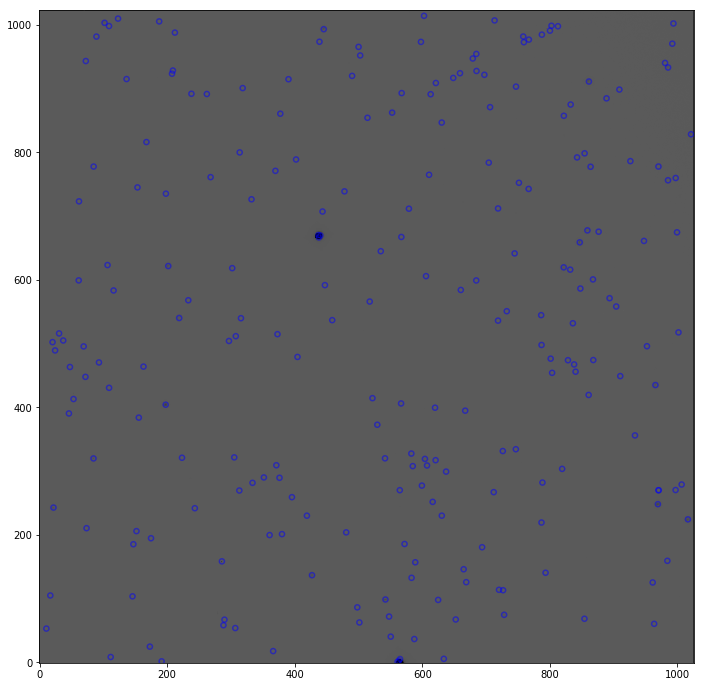

In [24]:
import matplotlib.pyplot as plt
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils import CircularAperture
fig, ax = plt.subplots(figsize=(12, 12))
positions = (sources['xcentroid'], sources['ycentroid'])
apertures = CircularAperture(positions, r=4.)
norm = ImageNormalize(stretch=SqrtStretch())
ax.imshow(data, cmap='Greys', origin='lower', norm=norm)
apertures.plot(color='blue', lw=1.5, alpha=0.5)